In [1]:
import skimage.io as io
import scipy.io as scipyio
from PIL import Image
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [117]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
path_to_depth = 'NYU_data/nyu_depth_v2_labeled.mat'
f = h5py.File(path_to_depth)
print(f.keys())
len(f['images'])

<KeysViewHDF5 ['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']>


1449

In [3]:
imag = f['images'][0]
imag.shape

(3, 640, 480)

In [4]:
# reshape
im = np.transpose(imag, (2, 1, 0))
im.shape

(480, 640, 3)

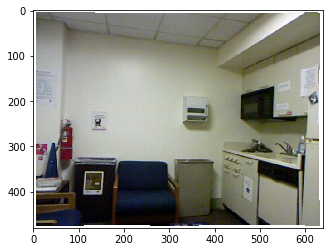

In [5]:
img__= Image.fromarray(im.astype(np.uint8), 'RGB')
plt.imshow(np.asarray(img__))

In [17]:
img__.size

(640, 480)

(608, 448)

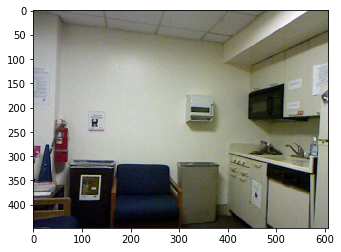

In [239]:
from PIL import ImageOps

border = (16, 16, 16, 16) # left, up, right, bottom
cropped_img = ImageOps.crop(img__, border)

plt.imshow(np.asarray(cropped_img))
cropped_img.size

(228, 304, 3)

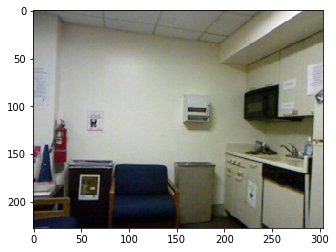

In [7]:
resized_img = cropped_img.resize((304, 228), Image.BILINEAR)
plt.imshow(np.asarray(resized_img))
resized_img.size
np.asarray(resized_img).shape

1.7985953

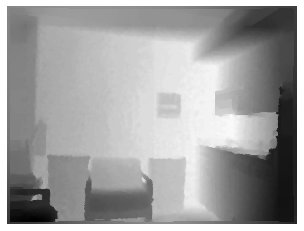

In [42]:
# read corresponding depth (aligned to the image, in-painted) of size [640 x 480], float64
depth = f['depths'][0].T

plt.imshow(depth,cmap='gray')
plt.axis('off')

dp = f['depths']
np.asarray(depth)[np.asarray(depth)< 0.3]
np.asarray(depth).min()

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


(128, 160)

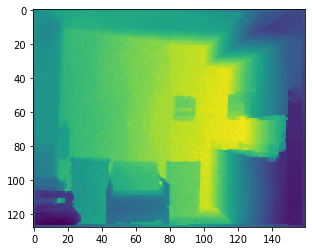

In [43]:
dpth = Image.fromarray(depth.astype(np.float64))
resized_dpth = dpth.resize((160, 128), Image.NEAREST)
dpth = np.array(dpth)/1000.
plt.imshow(np.asarray(resized_dpth))
resized_dpth1 = np.expand_dims(resized_dpth, axis = 3)
resized_dpth1.size
np.asarray(resized_dpth).shape

In [16]:
depth -= depth.min()
depth /= (depth.max()-depth.min())

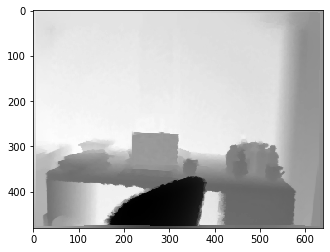

In [17]:
plt.imshow(depth,cmap='gray')

In [101]:
    from PIL import Image
    from PIL import ImageOps
    
    images = []
    depths = []

    for index in range(0,50):

        img_file = f['images'][index]
        dpth_file = f['depths'][index].T
        
        img_reshaped = np.transpose(img_file, (2, 1, 0))
        
        img= Image.fromarray(img_reshaped.astype(np.uint8), 'RGB')
        dpth = Image.fromarray(dpth_file.astype(np.float64))
        
        border = (16, 16, 16, 16) # left, up, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        resized_img = cropped_img.resize((304, 228), Image.BILINEAR)
        resized_dpth = dpth.resize((160, 128), Image.NEAREST)
        resized_dpth = np.expand_dims(resized_dpth, axis = 3)
            
        #dpth -= dpth.min()
        #dpth /= (dpth.max()-dpth.min())

        images.append(np.asarray(resized_img))
        depths.append(np.asarray(resized_dpth))
        
    images = np.asarray(images)
    depths = np.asarray(depths)

In [ ]:
python train.py C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/resnet_converted/resnet50_converted.ckpt C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat

python train.py /media/sdb/jesh/AppProject/FCRN-DepthPrediction/resnet_converted/resnet50_converted.ckpt /media/sdb/jesh/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat /media/sdb/jesh/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat

python evaluate.py C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/tensorflow/models/model_9.ckpt C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat
        
python predict.py /media/sdb/jesh/AppProject/FCRN-DepthPrediction/tensorflow/models/checkpoints/model_99.ckpt /media/sdb/jesh/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat 

In [307]:
import scipy.io

official_split = scipy.io.loadmat('NYU_data/splits.mat')
indices = np.squeeze(official_split['trainNdxs'], axis = 1)
#np.random.seed(0)
#np.random.shuffle(indices)
shuffled_indices, validation_indices = np.split(indices,[int(0.7 * len(indices))])
shuffled_indices.shape, validation_indices.shape
shuffled_indices.shape

(795,)

In [5]:
test_indices = np.squeeze(official_split['testNdxs'], axis = 1)
test_indices

array([   1,    2,    9,   14,   15,   16,   17,   18,   21,   28,   29,
         30,   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   46,   47,   56,   57,   59,   60,   61,   62,
         63,   76,   77,   78,   79,   84,   85,   86,   87,   88,   89,
         90,   91,  117,  118,  119,  125,  126,  127,  128,  129,  131,
        132,  133,  134,  137,  153,  154,  155,  167,  168,  169,  171,
        172,  173,  174,  175,  176,  180,  181,  182,  183,  184,  185,
        186,  187,  188,  189,  190,  191,  192,  193,  194,  195,  196,
        197,  198,  199,  200,  201,  202,  207,  208,  209,  210,  211,
        212,  220,  221,  222,  250,  264,  271,  272,  273,  279,  280,
        281,  282,  283,  284,  285,  296,  297,  298,  299,  300,  301,
        302,  310,  311,  312,  315,  316,  317,  325,  326,  327,  328,
        329,  330,  331,  332,  333,  334,  335,  351,  352,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  3

In [153]:
np.arange(870).shape

(870,)

In [16]:
resized_imgarray = np.asarray(resized_img)

In [17]:
resized_imgarray[0,0]

array([91, 92, 81], dtype=uint8)

In [25]:
fx_rgb = 5.1885790117450188e+02;
fy_rgb = 5.1946961112127485e+02;
cx_rgb = 3.2558244941119034e+02;
cy_rgb = 2.5373616633400465e+02;

cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
cam_matrix
inverse_cam_matrix = np.linalg.inv(cam_matrix)
inverse_cam_matrix

array([[ 0.00192731,  0.        , -0.6274983 ],
       [ 0.        ,  0.00192504, -0.48845238],
       [ 0.        ,  0.        ,  1.        ]])

In [65]:
nx, ny = (304, 228)
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
xv, yv = np.meshgrid(x, y)
zv = np.ones((ny,nx))
zv.shape

(228, 304)

In [98]:
pixel_cord = np.stack((xv,yv,zv), axis=2)
pixel_cord[227][303]

array([303., 227.,   1.])

In [117]:
metric_cord = np.empty(shape=(228,304,3))
for i in range(228):
    for j in range(304):
        metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
metric_cord

array([[[-0.6274983 , -0.48845238,  1.        ],
        [-0.62557099, -0.48845238,  1.        ],
        [-0.62364368, -0.48845238,  1.        ],
        ...,
        [-0.047378  , -0.48845238,  1.        ],
        [-0.04545069, -0.48845238,  1.        ],
        [-0.04352338, -0.48845238,  1.        ]],

       [[-0.6274983 , -0.48652734,  1.        ],
        [-0.62557099, -0.48652734,  1.        ],
        [-0.62364368, -0.48652734,  1.        ],
        ...,
        [-0.047378  , -0.48652734,  1.        ],
        [-0.04545069, -0.48652734,  1.        ],
        [-0.04352338, -0.48652734,  1.        ]],

       [[-0.6274983 , -0.4846023 ,  1.        ],
        [-0.62557099, -0.4846023 ,  1.        ],
        [-0.62364368, -0.4846023 ,  1.        ],
        ...,
        [-0.047378  , -0.4846023 ,  1.        ],
        [-0.04545069, -0.4846023 ,  1.        ],
        [-0.04352338, -0.4846023 ,  1.        ]],

       ...,

       [[-0.6274983 , -0.05531828,  1.        ],
        [-0

In [133]:
resized_imgarray[0][:5]

array([[ 91,  92,  81],
       [ 93,  93,  77],
       [ 93,  96,  81],
       [ 94,  99,  90],
       [ 97, 103,  92]], dtype=uint8)

In [134]:
np.set_printoptions(suppress=True) 
transfrmd_img = np.append(resized_imgarray, metric_cord[:,:,:2],axis = 2)
transfrmd_img[0][:5]

array([[ 91.        ,  92.        ,  81.        ,  -0.6274983 ,
         -0.48845238],
       [ 93.        ,  93.        ,  77.        ,  -0.62557099,
         -0.48845238],
       [ 93.        ,  96.        ,  81.        ,  -0.62364368,
         -0.48845238],
       [ 94.        ,  99.        ,  90.        ,  -0.62171637,
         -0.48845238],
       [ 97.        , 103.        ,  92.        ,  -0.61978906,
         -0.48845238]])

In [180]:
def calculateMetricCordinates():
    
    fx_rgb = 5.1885790117450188e+02;
    fy_rgb = 5.1946961112127485e+02;
    cx_rgb = 3.2558244941119034e+02;
    cy_rgb = 2.5373616633400465e+02;

    cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
    inverse_cam_matrix = np.linalg.inv(cam_matrix)
    nx, ny = (304, 228)
    x = np.linspace(0, nx-1, nx)
    y = np.linspace(0, ny-1, ny)
    xv, yv = np.meshgrid(x, y)
    zv = np.ones((ny,nx))
    pixel_cord = np.stack((xv,yv,zv), axis=2)
    metric_cord = np.empty(shape=(228,304,3))
    for i in range(228):
        for j in range(304):
            metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
    return metric_cord[:,:,:2]

calculateMetricCordinates()

array([[[-0.6274983 , -0.48845238],
        [-0.62557099, -0.48845238],
        [-0.62364368, -0.48845238],
        ...,
        [-0.047378  , -0.48845238],
        [-0.04545069, -0.48845238],
        [-0.04352338, -0.48845238]],

       [[-0.6274983 , -0.48652734],
        [-0.62557099, -0.48652734],
        [-0.62364368, -0.48652734],
        ...,
        [-0.047378  , -0.48652734],
        [-0.04545069, -0.48652734],
        [-0.04352338, -0.48652734]],

       [[-0.6274983 , -0.4846023 ],
        [-0.62557099, -0.4846023 ],
        [-0.62364368, -0.4846023 ],
        ...,
        [-0.047378  , -0.4846023 ],
        [-0.04545069, -0.4846023 ],
        [-0.04352338, -0.4846023 ]],

       ...,

       [[-0.6274983 , -0.05531828],
        [-0.62557099, -0.05531828],
        [-0.62364368, -0.05531828],
        ...,
        [-0.047378  , -0.05531828],
        [-0.04545069, -0.05531828],
        [-0.04352338, -0.05531828]],

       [[-0.6274983 , -0.05339324],
        [-0.62557099, -0.05

75 106


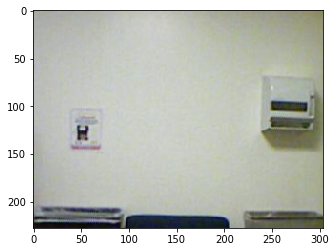

In [188]:
def initIntrinsic():
    
    fx_rgb = 5.1885790117450188e+02
    fy_rgb = 5.1946961112127485e+02
    cx_rgb = 3.2558244941119034e+02
    cy_rgb = 2.5373616633400465e+02
    width = 640
    height = 480
    crop_cx_rgb = cx_rgb - 16 #because of white border cropping
    crop_cy_rgb = cy_rgb - 16
    new_fx, new_fy ,new_cx, new_cy = resize(height, width, fx_rgb, fy_rgb, cx_rgb, cy_rgb, 0.475) #resized to (228, 304, 3)
    return new_fx, new_fy ,new_cx, new_cy
    
def recalculateIntrinsic(height, width, crop_row_ci, crop_col_cj, fx_rgb, fy_rgb, cx_rgb, cy_rgb, scale):
    
    new_cx_rgb = cx_rgb + float(width-1)/2 - crop_col_cj
    new_cy_rgb = cy_rgb + float(height-1)/2 - crop_row_ci
    new_fx, new_fy ,new_cx, new_cy = resize(height, width, fx_rgb, fy_rgb, new_cx_rgb, new_cy_rgb, scale)
    return new_fx, new_fy ,new_cx, new_cy

def resize(height, width, fx, fy, cx_rgb, cy_rgb, scale):
    
        center_x = float(width-1) / 2
        center_y = float(height-1) / 2
        orig_cx_diff = cx_rgb - center_x
        orig_cy_diff = cy_rgb - center_y
        scaled_height = scale * height
        scaled_width = scale * width
        scaled_center_x = float(scaled_width-1) / 2
        scaled_center_y = float(scaled_height-1) / 2
        new_fx = scale * fx
        new_fy = scale * fy
        #skew = scale * self.skew
        new_cx = scaled_center_x + scale * orig_cx_diff
        new_cy = scaled_center_y + scale * orig_cy_diff
        return new_fx, new_fy ,new_cx, new_cy
    
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :], x, y

#crop_img,col_cj,row_ci = random_crop(np.asarray(cropped_img), (114, 152))
crop_img,col_cj,row_ci = random_crop(np.asarray(cropped_img), (224, 304))
print(col_cj,row_ci)
#plt.imshow(crop_img)
crop_img.shape
new_fx, new_fy ,new_cx, new_cy = initIntrinsic()
final_fx, final_fy ,final_cx, final_cy = recalculateIntrinsic(114, 152, row_ci, col_cj, new_fx, new_fy ,new_cx, new_cy, 2.0)
resize_img = Image.fromarray(crop_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
plt.imshow(np.asarray(resize_img))

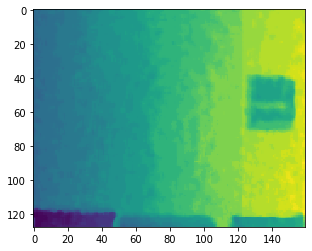

In [189]:
dpthe = Image.fromarray(dpth.astype(np.float64))
crop_dpth = np.asarray(ImageOps.crop(dpthe, border))[row_ci:row_ci+224, col_cj: col_cj + 304]
rescaled_dpth = Image.fromarray(crop_dpth).resize((160, 128), Image.NEAREST)
plt.imshow(rescaled_dpth)

1


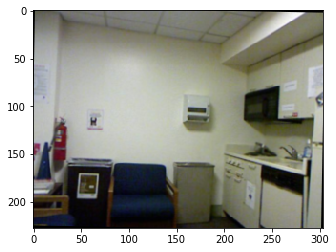

In [283]:
import imgaug.augmenters as iaa
import imgaug as ia

angle = np.random.randint(-10,10)
print(angle)
rotate = iaa.Affine(rotate=angle)
rotated_img = rotate.augment_image(np.asarray(resized_img))
rotated_dpth = rotate.augment_image(np.asarray(resized_dpth))
plt.imshow(rotated_img)

colorjitter = iaa.AddToHueAndSaturation((-60, 60))
enhanced_img = colorjitter.augment_image(np.asarray(resized_img))
#plt.imshow(enhanced_img)

flp = iaa.VerticalFlip(0.5)
flipped_img = flp.augment_image(np.asarray(resized_img))
flipped_dpth = flp.augment_image(np.asarray(resized_dpth))
#plt.imshow(flipped_img)

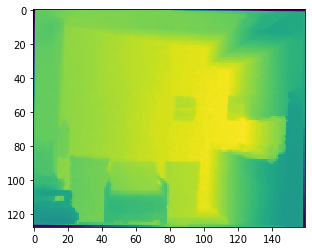

In [284]:
plt.imshow(rotated_dpth)

In [312]:
def augment_images(im_dir, indices): 
    f = h5py.File(im_dir)
    augmented_imgs = []
    augmented_gts = []
    ia.seed(1)
    print(indices.shape)
    for index in indices:
        img_file = f['images'][index]
        dpth_file = f['depths'][index].T
        
        img_reshaped = np.transpose(img_file, (2, 1, 0))
        
        img= Image.fromarray(img_reshaped.astype(np.uint8), 'RGB')
        dpth = Image.fromarray(dpth_file.astype(np.float64))
        
        border = (16, 16, 16, 16) # left, up, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        border = (16, 16, 16, 16) # left, up, right, bottom
        cropped_dpth = ImageOps.crop(dpth, border)
        
        resized_img = cropped_img.resize((304, 228), Image.BILINEAR)       
        resized_dpth = cropped_dpth.resize((160, 128), Image.NEAREST)      
        resized_dpth = np.expand_dims(resized_dpth, axis = 3)
        
        augmented_imgs.append(np.asarray(resized_img))
        augmented_gts.append(np.asarray(resized_dpth))
        
        augment_operations(cropped_img, cropped_dpth, resized_img, resized_dpth, augmented_imgs, augmented_gts)
        
    augmented_imgs = np.asarray(augmented_imgs)
    augmented_gts = np.asarray(augmented_gts)
    
    return augmented_imgs,augmented_gts

def augment_operations(cropped_img, cropped_dpth, resized_img, resized_dpth, augmented_imgs, augmented_gts):
    
    for i in range(3):
        crop_img,col_cj,row_ci = random_crop(np.asarray(cropped_img), (224, 304))
        resize_img = Image.fromarray(crop_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
        crop_dpth = np.asarray(cropped_dpth)[row_ci:row_ci+224, col_cj: col_cj + 304]
        resize_dpth = Image.fromarray(crop_dpth).resize((160, 128), Image.NEAREST)
        resize_dpth = np.expand_dims(resize_dpth, axis = 3)
        augmented_imgs.append(np.asarray(resize_img))
        augmented_gts.append(np.asarray(resize_dpth))
        
    angle = np.random.randint(-10,10)
    rotate = iaa.Affine(rotate=angle)
    rotated_img = rotate.augment_image(np.asarray(cropped_img))
    rotated_img = Image.fromarray(rotated_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
    rotated_dpth = rotate.augment_image(np.asarray(cropped_dpth))
    rotated_dpth = Image.fromarray(rotated_dpth).resize((160, 128), Image.NEAREST)
    rotated_dpth = np.expand_dims(rotated_dpth, axis = 3)
    augmented_imgs.append(np.asarray(rotated_img))
    augmented_gts.append(np.asarray(rotated_dpth))
        
    colorjitter = iaa.AddToHueAndSaturation((-60, 60))
    enhanced_img = colorjitter.augment_image(np.asarray(resized_img))
    augmented_imgs.append(np.asarray(enhanced_img))
    augmented_gts.append(np.asarray(resized_dpth))
        
    flp = iaa.VerticalFlip(1)
    flipped_img = flp.augment_image(np.asarray(resized_img))
    flipped_dpth = flp.augment_image(np.asarray(resized_dpth))
    augmented_imgs.append(np.asarray(flipped_img))
    augmented_gts.append(np.asarray(flipped_dpth))
        
    flp2 = iaa.HorizontalFlip(1)
    flipped_img2 = flp2.augment_image(np.asarray(resized_img))
    flipped_dpth2 = flp2.augment_image(np.asarray(resized_dpth))
    augmented_imgs.append(np.asarray(flipped_img2))
    augmented_gts.append(np.asarray(flipped_dpth2))
        
immgs, dppths = augment_images(path_to_depth, shuffled_indices)

(556,)


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [313]:
immgs.shape

(4448, 228, 304, 3)

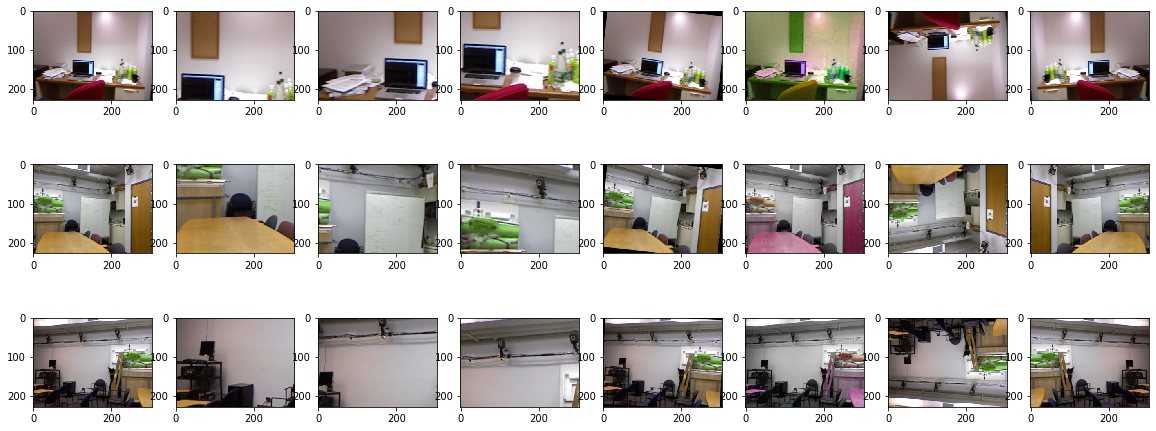

In [314]:
fig=plt.figure(figsize=(20,8))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immgs[i])
plt.show()

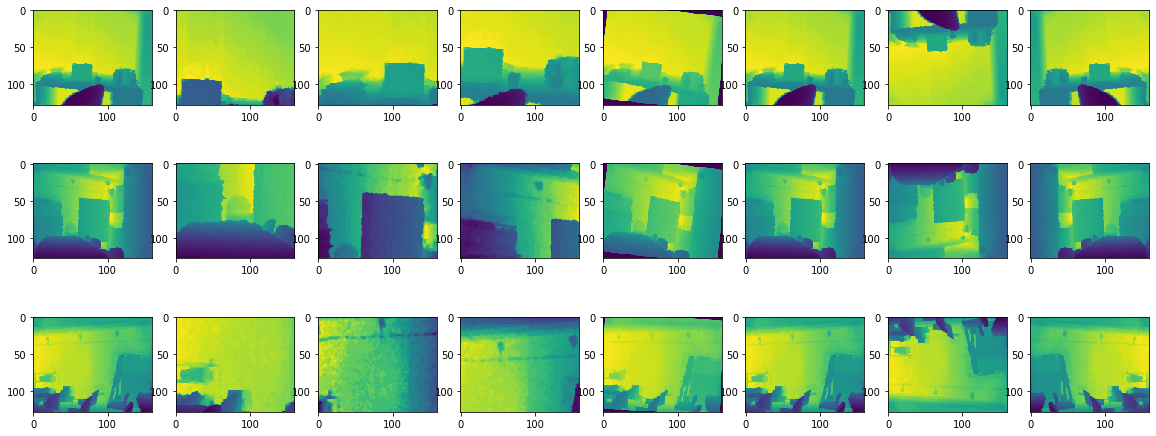

In [315]:
fig=plt.figure(figsize=(20, 8))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(dppths[i][:,:,0])
plt.show()

In [48]:
def findMetricCordinates(fx_rgb, fy_rgb, cx_rgb, cy_rgb):

    cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
    inverse_cam_matrix = np.linalg.inv(cam_matrix)
    nx, ny = (304, 228)
    x = np.linspace(0, nx-1, nx)
    y = np.linspace(0, ny-1, ny)
    xv, yv = np.meshgrid(x, y)
    zv = np.ones((ny,nx))
    pixel_cord = np.stack((xv,yv,zv), axis=2)
    metric_cord = np.empty(shape=(228,304,3))
    for i in range(228):
        for j in range(304):
            metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
    return metric_cord[:,:,:2]

findMetricCordinates(final_fx, final_fy ,final_cx, final_cy)

array([[[-0.81206358, -0.35263571],
        [-0.81003484, -0.35263571],
        [-0.80800609, -0.35263571],
        ...,
        [-0.20141064, -0.35263571],
        [-0.19938189, -0.35263571],
        [-0.19735315, -0.35263571]],

       [[-0.81206358, -0.35060935],
        [-0.81003484, -0.35060935],
        [-0.80800609, -0.35060935],
        ...,
        [-0.20141064, -0.35060935],
        [-0.19938189, -0.35060935],
        [-0.19735315, -0.35060935]],

       [[-0.81206358, -0.34858299],
        [-0.81003484, -0.34858299],
        [-0.80800609, -0.34858299],
        ...,
        [-0.20141064, -0.34858299],
        [-0.19938189, -0.34858299],
        [-0.19735315, -0.34858299]],

       ...,

       [[-0.81206358,  0.10329492],
        [-0.81003484,  0.10329492],
        [-0.80800609,  0.10329492],
        ...,
        [-0.20141064,  0.10329492],
        [-0.19938189,  0.10329492],
        [-0.19735315,  0.10329492]],

       [[-0.81206358,  0.10532128],
        [-0.81003484,  0.10